In [ ]:
#Download the student_evaluation_dataset. This data set contains a total 5820 evaluation scores provided by students from a University 
#[1]. The data consists of 33 features which represent 28 course specific questions and additional 5 generic questions.
#There are no missing values for any of the given features, so there is no concern or need for pre-processing the data. 
#All features are numeric.
#You are required to find a clustering algorithm(s) to best generalize the data and try to cluster students according to how many times 
#do they take the evaluated course. This is represented by the feature (nb.repeat) which is considered the target feature for this problem. 
#You are expected to build at least two various models and select which model works better than others. You need to conclude your choice of 
#the most efficient algorithm and how did you refine its parameters to improve the generalization accuracy. 
#Recall that clustering involves unsupervised learning approach so you need to adapt the data to reflect this fact
# (i.e., the independent features should not include your target feature).
#This time please build your program in an efficient way by splitting your program into functions that allow reusing your code without redundancy.
#All specifications met, including: creating at least one function, using several number of clusters, 
#choosing the best Number of cluster and visualization the elbow results.

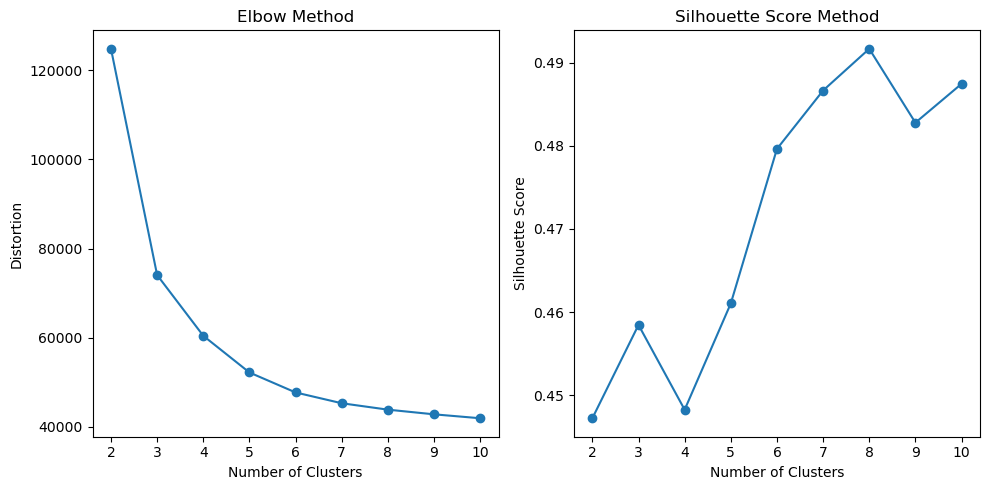

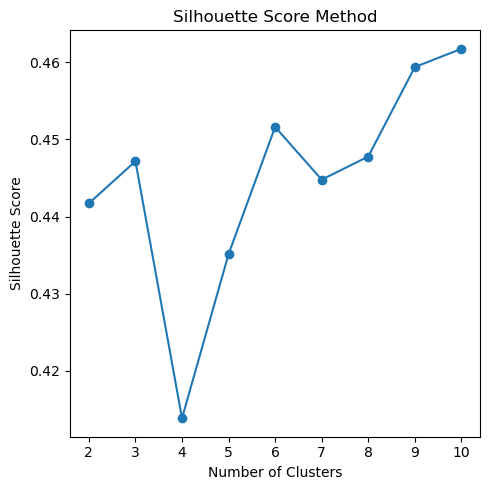

The algorithm is: KMeans
The best number of clusters based on the elbow method is:  3
The best number of clusters based on the silhouette score method is:  9
The algorithm is: Agglomerative Clustering
The best number of clusters based on the silhouette score method is:  10


In [35]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering


df = pd.read_csv('student_evaluation_dataset.csv')
target_feature = 'nb.repeat'
independent_features = df.columns[5:]

def perform_kmeans_clustering(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    return kmeans.labels_

def comp_clust_algorithms(df, independent_features, target_feature):
    X = df[independent_features].values
    y = df[target_feature].values
    
    silhouette_scores = []
    distortions = []
    
    max_clusters = 10
    
    for n_clusters in range(2, max_clusters+1):
        kmeans_labels = perform_kmeans_clustering(X, n_clusters)
        silhouette_scores.append(silhouette_score(X, kmeans_labels))
        distortions.append(KMeans(n_clusters=n_clusters, random_state=42).fit(X).inertia_)
        
    # plot elbow graph
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters+1), distortions, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')

    # plot silhouette score graph
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method')
    
    plt.tight_layout()
    plt.show()

    #optimal number of clusters based on the elbow method
    elbow_point = 3  
    for i in range(1, len(distortions)-1):
        if distortions[i-1] - distortions[i] > distortions[i] - distortions[i+1]:
            elbow_point = i+2
            break
    
    
def perform_agg_clustering(X, n_clusters):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    agg_clustering.fit(X)
    return agg_clustering.labels_

def clustering_algorithms(df, independent_features, target_feature):
    X = df[independent_features].values
    y = df[target_feature].values
    
    silhouette_scores = []
    distortions = []
    
    max_clusters = 10
    
    for n_clusters in range(2, max_clusters+1):
        agg_labels = perform_agg_clustering(X, n_clusters)
        silhouette_scores.append(silhouette_score(X, agg_labels))
        
    # silhouette score graph
    plt.figure(figsize=(5,5))
    plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method')
    plt.tight_layout()
    plt.show()

    #optimal number of clusters based on the elbow method
    elbow_point = 3  
    for i in range(1, len(distortions)-1):
        if distortions[i-1] - distortions[i] > distortions[i] - distortions[i+1]:
            elbow_point = i+2
            break
    
    #optimal number of clusters based on the silhouette score
    silh_scores = silhouette_scores[1:]  
    n_clusters_silh = np.argmax(silh_scores) + 2
    
    print("The algorithm is: KMeans")
    print("The best number of clusters based on the elbow method is: ", elbow_point)
    print("The best number of clusters based on the silhouette score method is: ", n_clusters_silh)


    # optimal number of clusters based on the silhouette score method for agglo
    n_clusters_silh = np.argmax(silhouette_scores) + 2
    
    print("The algorithm is: Agglomerative Clustering")
    print("The best number of clusters based on the silhouette score method is: ", n_clusters_silh)


comp_clust_algorithms(df, independent_features, target_feature)

clustering_algorithms(df, independent_features, target_feature)

#  the KMeans algorithm with 3 clusters is the best choice as it has the highest silhouette score among the two algorithms.
